# Customer Churn Predictive Analysis

Did you know that acquiring a new customer costs five times more than retaining an existing one? That’s why predicting customer churn is a game-changer for businesses. Customer churn refers to the rate at which customers stop doing business with a company, and today, I’ll show you how to predict churn using data. 

Let’s get started!

## 1. Dataset Overview

First, let’s take a look at our dataset. We’re using a customer churn dataset.

### Data Importing

In [1]:
import pandas as pd

# Load dataset
data = pd.read_csv('churn analysis dataset.csv')
data.head()

,customerID,gender,SeniorCitizen,has Partner,has Dependents,start date,tenure months,PhoneService,MultipleLines,service ID,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,payment Method ID,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,11/7/2024,1.0,No,No phone service,1.0,...,No,No,No,No,Month-to-month,p3,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,2/7/2022,34.0,Yes,No,1.0,...,Yes,No,No,No,One year,p4,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,10/7/2024,2.0,Yes,No,1.0,...,No,No,No,No,Month-to-month,p4,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,3/7/2021,45.0,No,No phone service,1.0,...,Yes,Yes,No,No,One year,p1,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,10/7/2024,2.0,Yes,No,2.0,...,No,No,No,No,Month-to-month,p3,Electronic check,70.70,151.65,Yes


It has columns like:

- Customer demographics (gender).
- Service usage patterns (monthly charges, tenure).
- Churn status (yes or no).

### Data Preprocessing

In [2]:
# Clean and preprocess data
# Categorical Variables Encoding
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})  # Convert 'Yes'/'No' to binary
data['Contract'] = data['Contract'].astype('category')

# Show data size (#rows, #columns)
data.dropna(inplace=True)
data.shape

(7052, 23)

----------------------------------

## 2. EDA and Visualization

Now, let’s perform some exploratory data analysis to understand churn patterns. 

First, let’s check the overall churn rate.

### Overall Churn Rate
A simple pie chart showing the proportion of customers who churned versus those who didn’t.

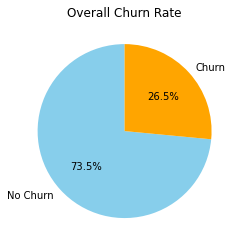

<Figure size 432x288 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Churn rate visualization
churn_counts = data['Churn'].value_counts()
plt.pie(churn_counts, labels=['No Churn', 'Churn'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Overall Churn Rate')
plt.show()
plt.savefig('Churn Distribution.png')

We see that 26.5% of customers have churned. Let’s dig deeper into why.

### Churn Rate by Contract Type

Here’s a bar chart comparing churn rates by contract type (e.g., Month-to-Month, One-Year, Two-Year).

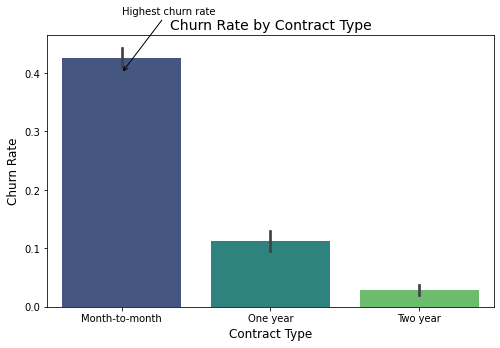

<Figure size 432x288 with 0 Axes>

In [4]:
# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Contract', y='Churn', data=data, estimator=lambda x: sum(x==1)/len(x), palette='viridis')
plt.title('Churn Rate by Contract Type', fontsize=14)
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.annotate('Highest churn rate', xy=(0, 0.4), xytext=(0, 0.5), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.show()
plt.savefig('Churn Rate by Contract-Type.png')

Clearly, customers on month-to-month contracts have the highest churn rate, suggesting they’re more likely to leave without long-term commitments.

### Monthly Charges Distribution
Understand how monthly charges vary among customers who churn versus those who don’t.

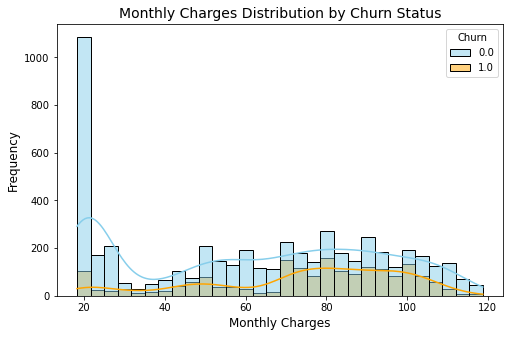

<Figure size 432x288 with 0 Axes>

In [5]:
# Histogram of Monthly Charges by Churn
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='MonthlyCharges', hue='Churn', kde=True, palette=['skyblue', 'orange'], bins=30)
plt.title('Monthly Charges Distribution by Churn Status', fontsize=14)
plt.xlabel('Monthly Charges', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()
plt.savefig('Monthly Charges by Churn.png')

### Correlation Heatmap
Identify relationships between features like tenure, monthly charges, and churn.

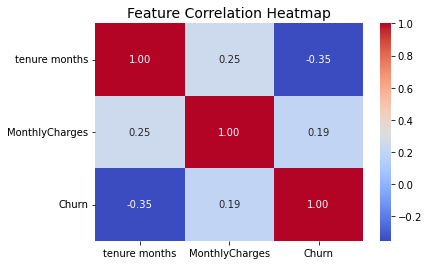

<Figure size 432x288 with 0 Axes>

In [6]:
import numpy as np

# Correlation matrix
corr = data[['tenure months', 'MonthlyCharges', 'Churn']].corr()

# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Feature Correlation Heatmap', fontsize=14)
plt.show()
plt.savefig('Feature Correlation Heatmap.png')

----------------------------------

## 3. Feature Engineering

Next, we’ll create features to improve our model. For example, I’ve added:

- A binary feature for ‘Discount Eligible.’
- A categorical variable for ‘Payment Method.’

These features will help the model better understand churn behavior.

In [7]:
# Adding a binary feature
data['Discount_Eligible'] = data['MonthlyCharges'] < 50
# Encoding Payment Method
data = pd.get_dummies(data, columns=['PaymentMethod'], drop_first=True)

----------------------------------

## 4. Model Building

Now, let’s build a predictive model. For simplicity, I’ll use a Decision Tree, which is great for binary classification like churn prediction. Here’s the process:

- Split the dataset into training and testing sets.
- Fit the model.
- Evaluate the performance.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Prepare data
X = data[['MonthlyCharges', 'tenure months', 'Discount_Eligible']]
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7159735349716446


Here’s the accuracy: 71%. It’s a good baseline!

You can enhance accuracy using the other columns provided in our dataset, more data, or more advanced model _Gradient Boosting or Neural Networks_. 

### Decision Tree Visualization
Visulaize the trained decision tree model’s structure.

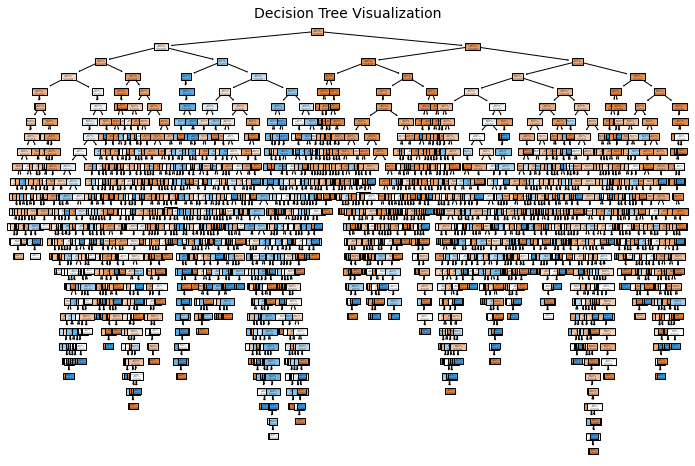

<Figure size 432x288 with 0 Axes>

In [9]:
from sklearn.tree import plot_tree

# Plot Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=['MonthlyCharges', 'Tenure', 'Discount_Eligible'], class_names=['No Churn', 'Churn'], filled=True)
plt.title('Decision Tree Visualization', fontsize=14)
plt.show()
plt.savefig('Decision Tree Visualization.png')

----------------------------------

## 5. Insights and Actions

Based on the model, we identified customers with high churn risk. Businesses can now target these customers with retention offers, such as discounts or personalized plans. This proactive strategy could save thousands in revenue.

##### Conclusion
"Predicting customer churn helps businesses retain customers, optimize strategies, and save costs. It’s a powerful way to turn data into actionable insights."